# Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

$$\hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdot \cdot \cdot + \theta_nx_n$$

* $\hat y$ is the predicted value

* $n$ is the number of features

* $x_i$ is the $i^{th}$ feature value

* $\theta_j$ is the $j^{th}$ model parameter

This can be written much more concisely using a vectorized form

$$\hat y = h_\theta(x) = \theta \cdot x$$

* $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

* $x$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1

* $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0 + \theta_1x_1 + \cdot \cdot \cdot + \theta_nx_n$

* $h_0$ is the hypothesis function, using the model parameters $\theta$

We first need a measure of how well (or poorly) the model fits the training data. In Chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE

In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root)

The MSE of a Linear Regression hypothesis $h_0$ on a training set X is calculated using MSE cost function for a Linear Regression model

$$ MSE(X,h_\theta) = {1\over{m}} \sum_{i =1 }^m(\theta{^T}x^{(i)} - y^{(i)})^2  $$

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation

Normal Equation
$$ \hat\theta = (X^T X)^{-1} X^T y $$

* $\hat \theta$ is the value of $\theta$ that minimizes the cost function

* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

Let’s generate some linear-looking data to test this equation

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

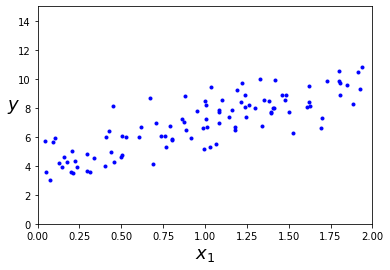

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\hat \theta$ using the Normal Equation. We will use the function from inv() NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication 

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_1$ + Gaussian noise. Let’s see what the equation found

In [4]:
theta_best

array([[4.03591225],
       [2.98383676]])

We would have hoped for $θ_0 = 4$ and $θ_1 = 3$ instead of $θ_0 = 4.215$ and $θ_1 = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function

Now you can make predictions using $\hat \theta$

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.03591225],
       [10.00358577]])

Let’s plot this model’s predictions

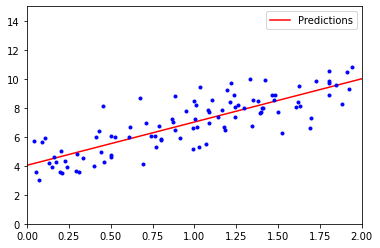

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(['Predictions'])
plt.show()

Performing linear regression using Scikit-Learn is quite simple

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.03591225]), array([[2.98383676]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.03591225],
       [10.00358577]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.03591225],
       [2.98383676]])

This function computes $\hat \theta = X^+ y$, 
where $X^+$ is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.03591225],
       [2.98383676]])

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \Sigma V^T$ (see numpy.linalg.svd())

The pseudoinverse is computed as $X^+ = V\Sigma U^T$. To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^T X$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined



# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function

it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gra dient is zero, you have reached a minimum

<p align='center'>
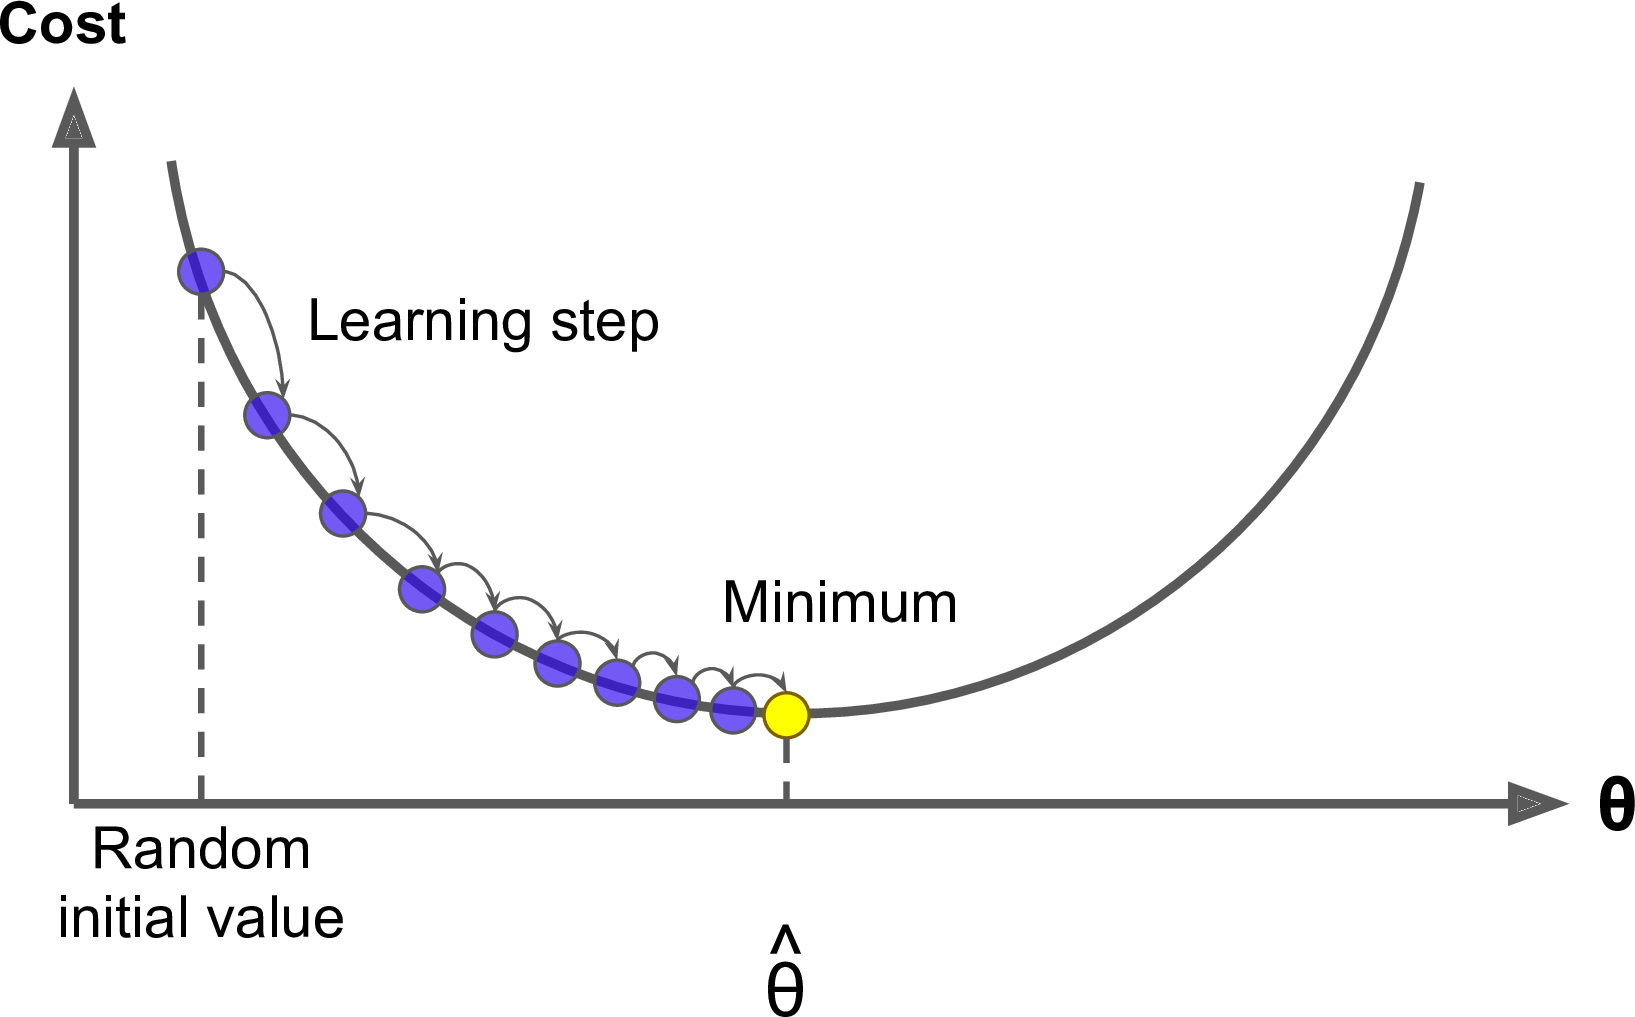

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

<p align='center'>
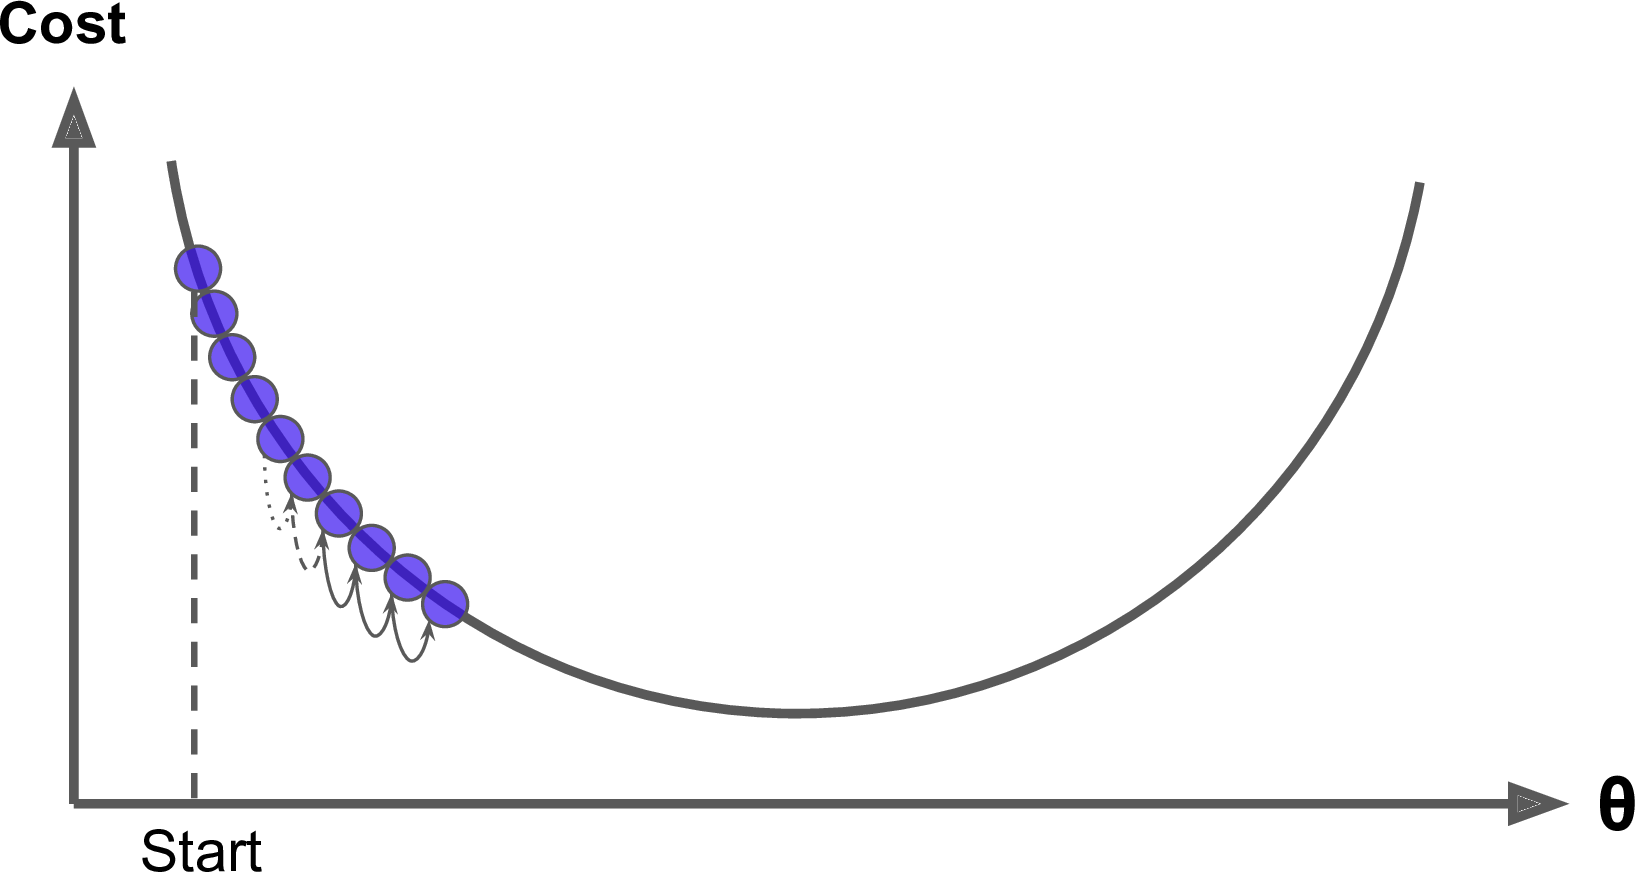
</p>

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

<p align='center'>
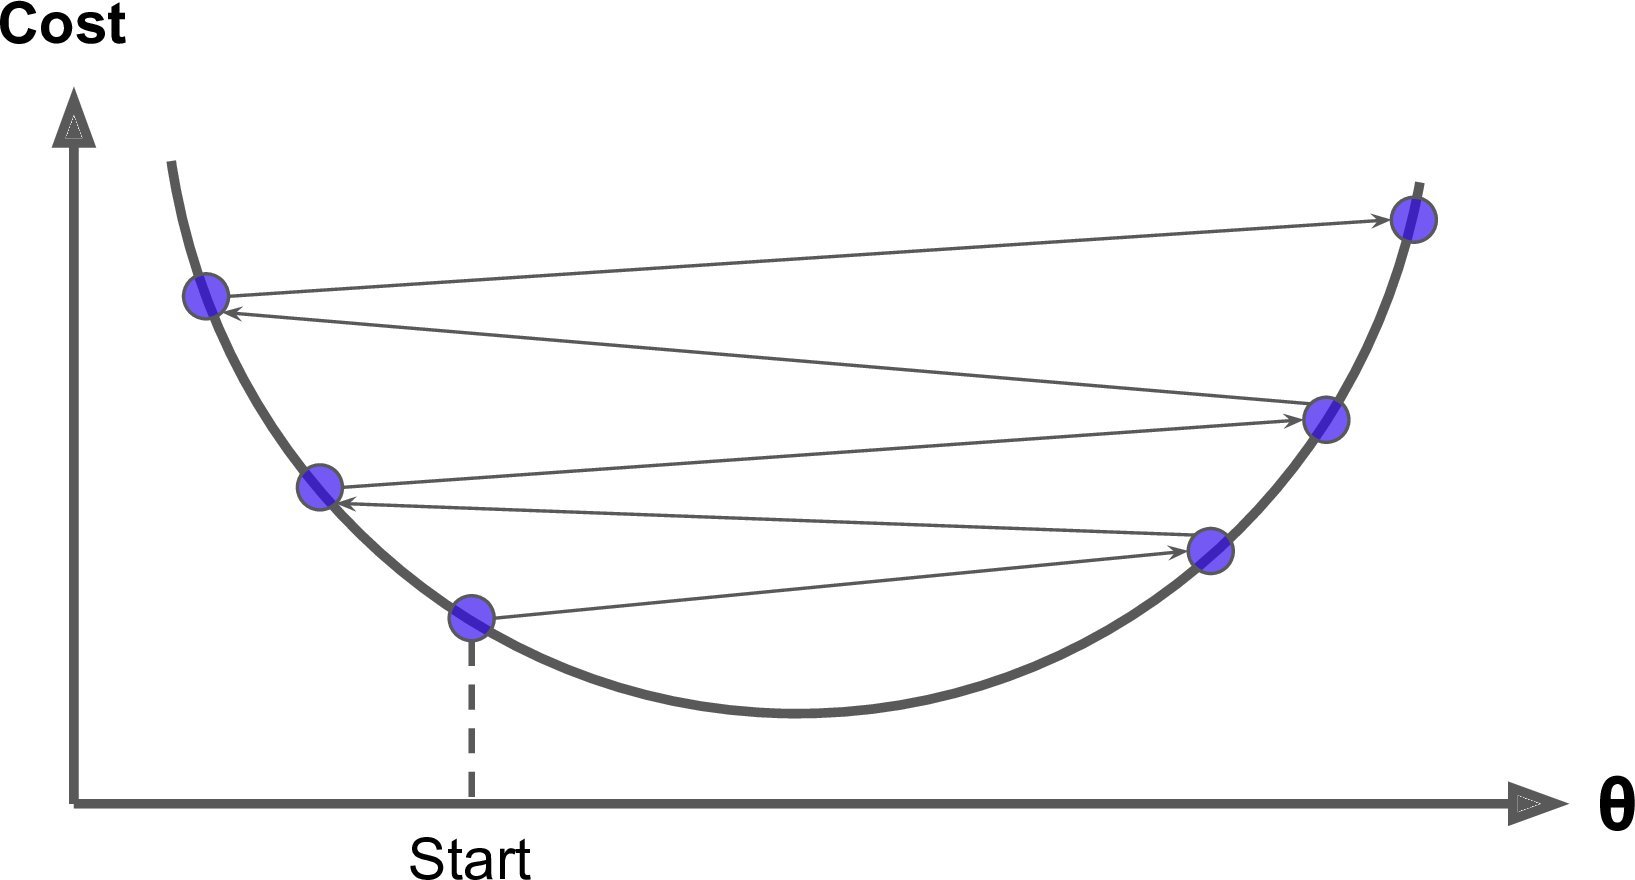
</p>

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func tion with regards to each model parameter $θ_j$. In other words, you need to calculate how much the cost function will change if you change $θ_j$ just a little bit. This is called
a partial derivative



Partial derivatives of the cost function
$${\delta\over \delta \theta_j} MSE(θ) = {2 \over m} {\sum_{i=1}^m} (θ^T x^{(i)} - y^{(i)}) x_j^{(i)}$$

Instead of computing these partial derivatives individually, you can use Equation below to compute them all in one go

The gradient vector, noted
$∇_θ MSE(θ)$, contains all the partial derivatives of the cost function (one for each model parameter)

Gradient vector of the cost function

$$ ∇_\theta MSE(\theta) = \begin{pmatrix} {\delta\over \delta \theta_0} MSE(θ) \\ {\delta\over \delta \theta_1} MSE(θ) \\ \vdots \\ {\delta\over \delta \theta_n} MSE(θ)  \end{pmatrix} = {2\over m} X^T (X\theta - y)$$

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets



Once you have the gradient vector, which points uphill, just go in the opposite direc tion to go downhill. This means subtracting $∇_θ MSE(θ)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step



Gradient Descent step

$$\theta^{(next step)} = \theta - \eta ∇_\theta MSE(\theta) $$

Let’s look at a quick implementation of this algorithm

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[4.03591225],
       [2.98383676]])

That’s exactly what the Normal Equation found. But what if you had used a different learning rate eta? Figure below shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point)

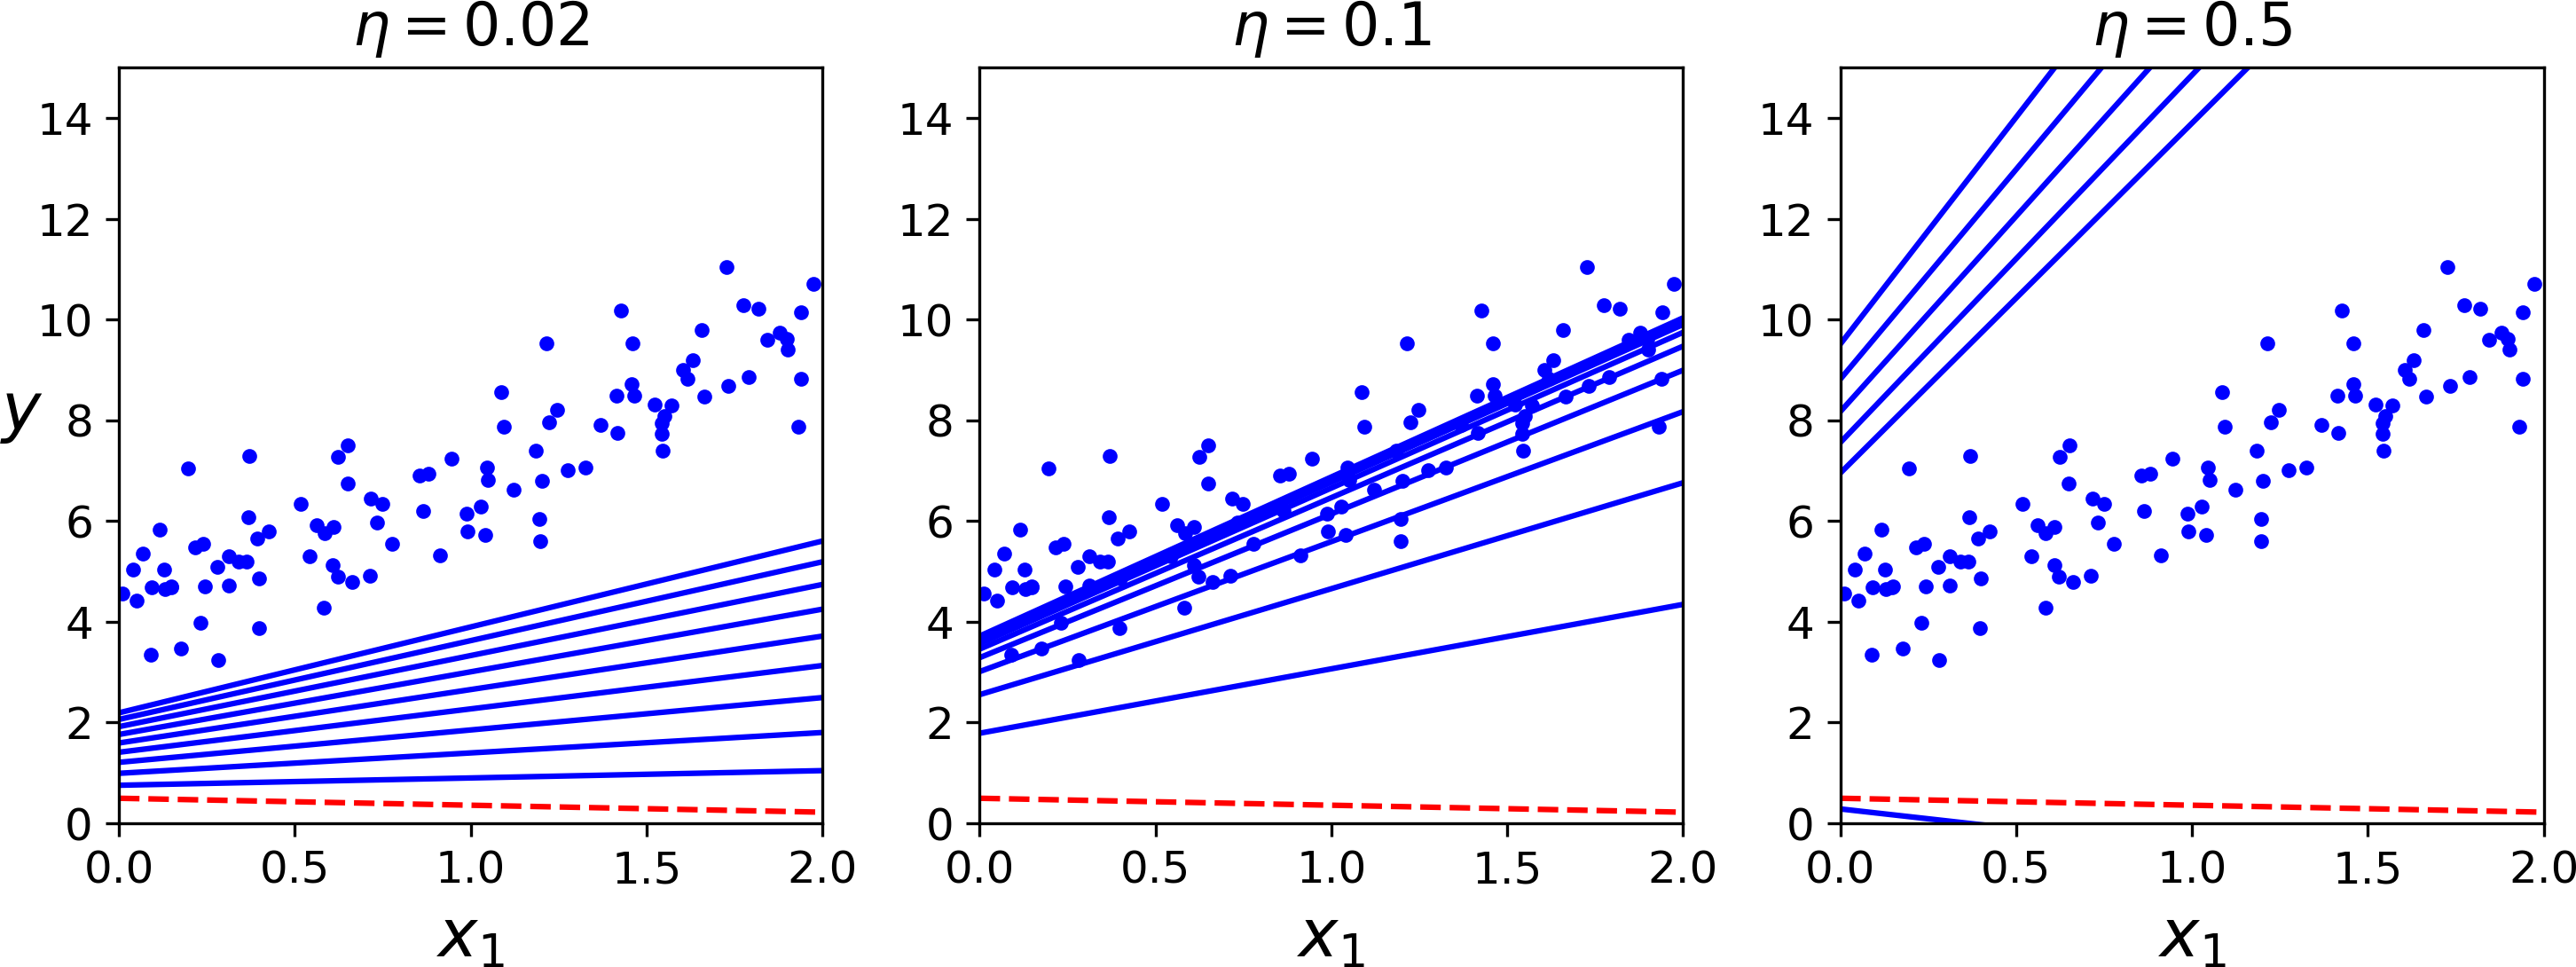

On the left, the learning rate is too low: the algorithm will eventually reach the solu tion, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learn ing rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large

At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algo rithm stops, the final parameter values are good, but not optimal

<p align='center'>
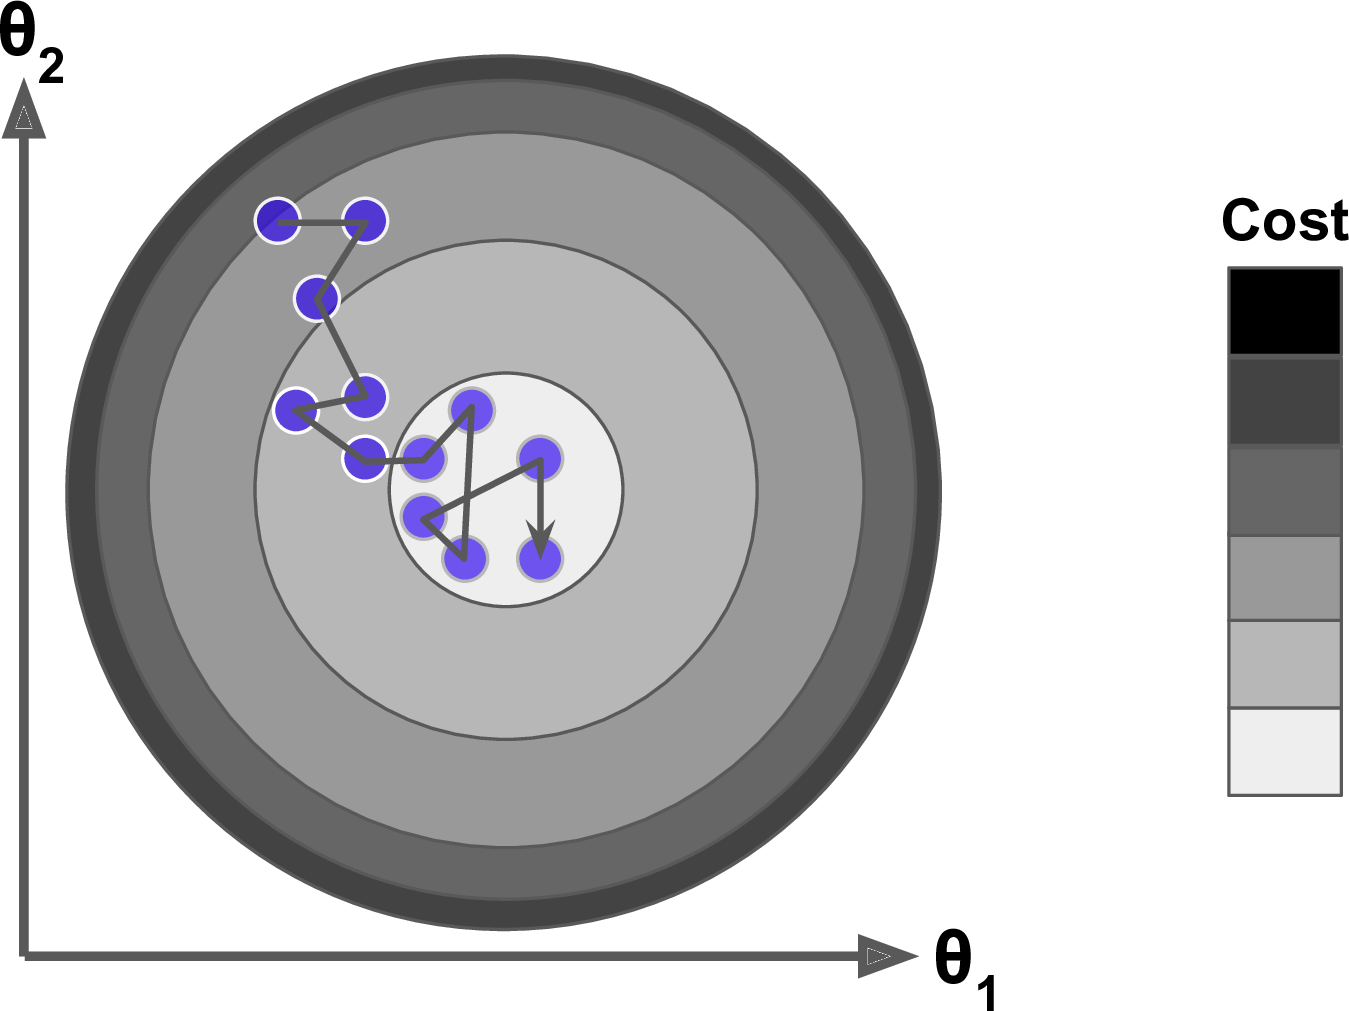
</p>

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate

The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum

The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early

This code implements Stochastic Gradient Descent using a simple learning schedule

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initalization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.98544481],
       [2.94168209]])